**Importación de bibliotecas a utilizar:**

In [87]:
import numpy as np                                        # Biblioteca de funciones matemáticas
import pandas as pd                                       # Biblioteca para manipulación de marcos de datos
from pandas.plotting import scatter_matrix                # Para generar matriz de diagramas de dispersión
import matplotlib.pyplot as plt                           # Biblioteca para salida gráfica
import geostatspy.GSLIB as GSLIB                          # Utilidades GSLIB y funciones envueltas
import geostatspy.geostats as geostats                    # GSLIB convertido a Python
import os                                                 # Para configurar el directorio de trabajo
plt.style.use('seaborn-bright')                           # Estilo visual de gráficos 

**Importación del dataset:**

In [88]:
os.chdir("C:/Users/heber/Documents/GSLIB_FOLDER") # ruta de ejecutables de GSLIB
df = pd.read_excel("C:/Users/heber/Desktop/trafico/" + "datos_2.xlsx", sep=",") #Ruta del archivo datos.xlsx
df.head(1) #Muestra los encabezados de las columnas que contiene el marco de datos y la primera fila (muestra)

,X,Y,Intensidad media diaria,Pesados número,Nº railes,Velocidad (Km/h),province
0,508305.7,4788905.6,33784.0,1925.688,2.0,80.0,Biskaia


In [89]:
df["X"] = df["X"]/10000 #división del eje x en 10,000 para disminuir el numero de digitos del número. 
df["Y"] = df["Y"]/10000 #división del eje y en 10,000 para disminuir el numero de digitos del número. 

**Declaración de variables a utilizar:**

In [90]:
x = df["X"] #Variable de posición en eje X sistema ETRS89
y = df["Y"] #Variable de posición en eje Y sistema ETRS89
imd = df["Intensidad media diaria"][np.isfinite(df["Intensidad media diaria"])] #Variable de interés 1
pesados =df["Pesados número"][np.isfinite(df["Pesados número"])] #Variable de interés 2
railes = df["Nº railes"][np.isfinite(df["Nº railes"])] #Variable de interés 3 (Esta variable es categorica)
vm = df["Velocidad (Km/h)"][np.isfinite(df["Velocidad (Km/h)"])] #Variable de interés 4

In [91]:
df.describe().transpose() #estadísticos básicos del marco de datos 

,count,mean,std,min,25%,50%,75%,max
X,1246.0,52.675990,2.729776,46.415680,50.568503,52.371161,54.267137,60.266842
Y,1246.0,477.085314,2.496187,470.456568,474.942153,477.728767,479.215879,480.946700
Intensidad media diaria,1242.0,8766.239130,16836.049461,18.000000,395.500000,1962.000000,9274.500000,141110.000000
Pesados número,1089.0,843.101818,1756.159439,0.986000,19.106000,137.150000,653.380000,11077.545000
Nº railes,1231.0,1.257514,0.594943,1.000000,1.000000,1.000000,1.000000,4.000000
Velocidad (Km/h),1231.0,59.874086,20.539581,30.000000,50.000000,50.000000,70.000000,120.000000


**Matriz de correlación entre variables de interés:**

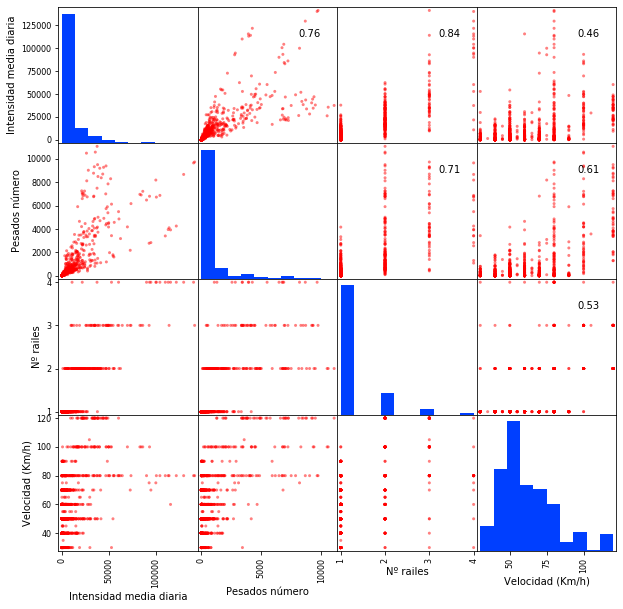

In [92]:
sub_dataset = ["Intensidad media diaria", "Pesados número", "Nº railes", "Velocidad (Km/h)"] #Lista variables de interés
df_sub = df[sub_dataset] #nuevo dataframe con variables de interés 

axes = scatter_matrix(df_sub, figsize=(10,10), color="red") #Matriz de diagramas de dispersión

corr = np.array(df_sub.corr()) #Coeficiente de correlación lineal
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)): 
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

**Diagrama de cajas y bigotes:** Luego se debe estudiar que hacer con valoes atipicos. 

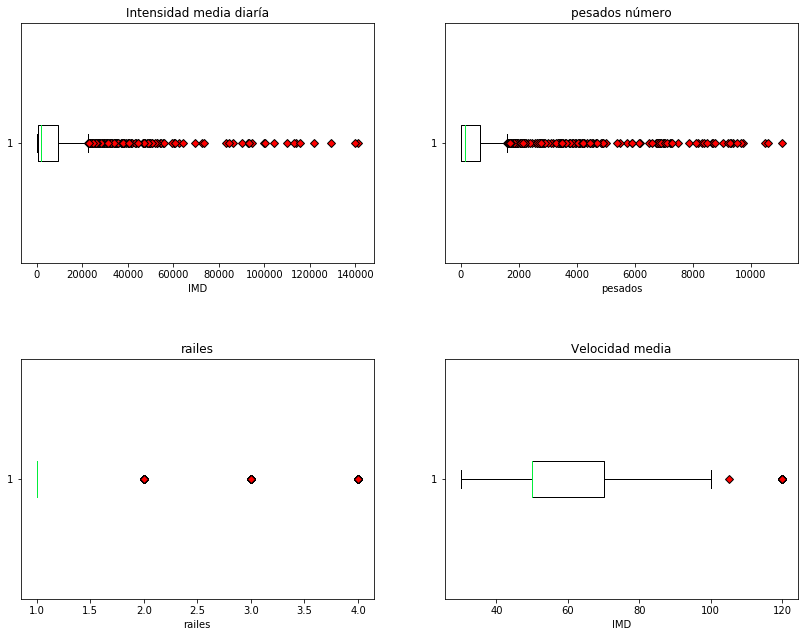

In [93]:
plt.subplot(221)
diamantes = dict(markerfacecolor='r', marker='D') 
plt.boxplot(imd, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("IMD")
plt.title("Intensidad media diaría")
plt.subplot(222)
plt.boxplot(pesados, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("pesados")
plt.title("pesados número")
plt.subplot(223)
plt.boxplot(railes, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("railes")
plt.title("railes")
plt.subplot(224)
plt.boxplot(vm, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("IMD")
plt.title("Velocidad media")
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2, wspace=0.2, hspace=0.4)
plt.show()

**Separación de variables por DF (marco de datos):** Esto se debe a la diferencia de valores totales por variable.

In [94]:
df_imd = df[np.isfinite(df["Intensidad media diaria"])]
df_pesados = df[np.isfinite(df["Pesados número"])]
df_railes = df[np.isfinite(df["Nº railes"])]
df_vm = df[np.isfinite(df["Velocidad (Km/h)"])]

**Disposición espacial de las variables de interés:**

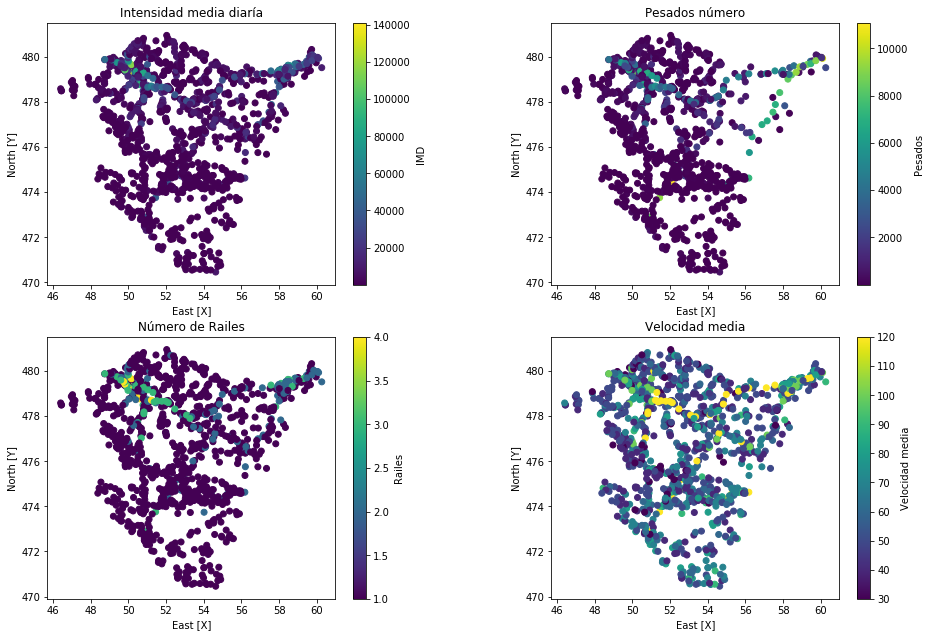

In [95]:
plt.subplot(221) #Salida de 4 gráficos en una fígura 
plt.scatter(df_imd["X"], df_imd["Y"], c=df_imd["Intensidad media diaria"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Intensidad media diaría")
cbar=plt.colorbar()
cbar.set_label('IMD', labelpad=+5)
plt.subplot(222)
plt.scatter(df_pesados["X"], df_pesados["Y"], c=df_pesados["Pesados número"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Pesados número")
cbar=plt.colorbar()
cbar.set_label('Pesados', labelpad=+5)
plt.subplot(223)
plt.scatter(df_railes["X"], df_railes["Y"], c=df_railes["Nº railes"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Número de Railes")
cbar=plt.colorbar()
cbar.set_label('Railes', labelpad=+5)
plt.subplot(224)
plt.scatter(df_vm["X"], df_vm["Y"], c=df_vm["Velocidad (Km/h)"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Velocidad media")
cbar=plt.colorbar()
cbar.set_label('Velocidad media', labelpad=+5)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.4, hspace=0.2)
plt.show()